## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [1]:
# Importem les llibreries necessàries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # Per ignorar possibles missatges d'error

# Especifiquem la ruta del fitxer que hem descarregat
ruta_fitxer = 'C:/Users/Ariadna/Desktop/IT ACADEMY/ESPECIALITZACIÓ/SPRINT 4/Sprint4 - 2a part/movies.dat'

# Carreguem el dataframe des del fitxer 
df_movies = pd.read_csv(ruta_fitxer, sep='\::', encoding='latin1', header=None) # Especifiquem tipus d'encoding i separador.
                                                                                # Indiquem que no té encapçalament.
# Mostrem les 10 primeres files del dataset movies
df_movies.head(10) 

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Com veiem, la primera fila amb les dades de la película Toy Story l'ha identificat com l'encapçalament del dataset. Per tant, ho haurem d'arreglar, creant un encapçalament amb el nom de les columnes que serà:
- Title
- Year
- Genre 

Tot i això, la columna Year l'afegirem més endavant perquè aquesta informació està agrupada amb la del títol de la película, en una sola columna.

In [2]:
# Assignem nom a les columnes del dataframe
df_movies.columns = ['ID', 'Title', 'Genre']

df_movies.head() # Mostrem el resultat

,ID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Creem la nova columna 'Year' de la qual extraiem els 4 caràcters dins del parèntesi de la columna 'Title'
df_movies['Year'] = df_movies['Title'].str.extract('\((\d{4})\)', expand=True)

df_movies.head() # Mostrem el resultat

,ID,Title,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


Ara seleccionarem un sol gènere per a cada película, en aquest cas triarem el primer que apareix ja que ens sembla el gènere principal, el que s'adequa més a la película.

In [5]:
# Creem la nova columna anomenada 'Main_genre' en la qual guardarem les dades extretes de la columna 'Genre', 
# concretament la primera cadena de caràcters que aparegui (índex 0) fins al símbol de barra vertical.
df_movies['Main_genre'] = df_movies['Genre'].str.split('|').str[0]

In [6]:
df_movies.head() # Mostrem el resultat amb la nova columna

,ID,Title,Genre,Year,Main_genre
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Comedy


Ara podem eliminar la columna 'Genre' perquè només volem conservar la nova.

In [7]:
# Eliminem la columna anomenada 'Genre'. Axis=1 ens indica que volem esborrar la columna. Un valor 0 indicaria la fila.
df_movies = df_movies.drop('Genre', axis=1)

df_movies.head(5) # Mostrem el resultat

,ID,Title,Year,Main_genre
0,1,Toy Story (1995),1995,Animation
1,2,Jumanji (1995),1995,Adventure
2,3,Grumpier Old Men (1995),1995,Comedy
3,4,Waiting to Exhale (1995),1995,Comedy
4,5,Father of the Bride Part II (1995),1995,Comedy


Ara observem quin tipus de dades tenim en cada variable

In [21]:
print(df_movies.dtypes)

ID             int64
Title         object
Year          object
Main_genre    object
dtype: object


Com que els valors de la columna 'Year' són tipus object i haurien de ser integers, els modificarem.

In [22]:
# Canviem el tipus de dada de la columna 'Year'
df_movies['Year'] = df_movies['Year'].astype(int)

Comprovem que s'hagi fet el canvi correctament

In [23]:
print(df_movies.dtypes)

ID             int64
Title         object
Year           int32
Main_genre    object
dtype: object


Com a tasca següent, haurem de revisar que les variables no continguin valors NaN.

In [8]:
# Comprovarem si alguna columna conté algun valor nul

print(df_movies.isna().any())

ID            False
Title         False
Year          False
Main_genre    False
dtype: bool


Com podem veure, no hi ha cap valor nul en el nostre dataset, per tant podrem començar a treballar amb ell extraient la informació que necessitem.

# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

En primer lloc ens agradaria mostrar un gràfic on puguem veure quin gènere és el més freqüent.

In [13]:
# Calculem la freqüència de cada gènere en el dataframe
genre_counts = df_movies['Main_genre'].value_counts()


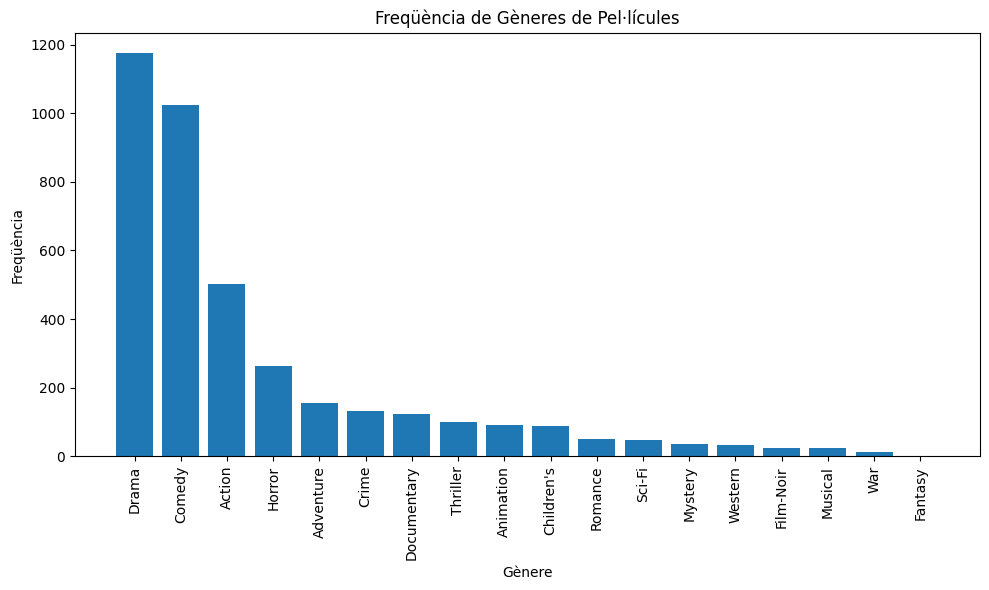

In [14]:
# Creem el gràfic per visualitzar les dades

import matplotlib.pyplot as plt # Importem la llibreria

# Configurem el gràfic
plt.figure(figsize=(10, 6)) # Especifiquem la mida
plt.bar(genre_counts.index, genre_counts.values) # Creem el gràfic de barres
plt.title('Freqüència de Gèneres de Pel·lícules') # Indiquem el títol del gràfic
plt.xlabel('Gènere') # Etiqueta de l'eix de les x
plt.ylabel('Freqüència') # Etiqueta de l'eix de les y
plt.xticks(rotation=90)  # Girem etiquetes de l'eix x en vertical per a una millor llegibilitat

# Mostrem el gràfic
plt.tight_layout() # Ajustem la mida del gràfic
plt.show()


Com podem veure, els gèneres més freqüents són Drama en primer lloc i Comèdia en segon lloc, a molta diferència de la resta de gèneres.

Ara volem crear un gràfic on veiem l'evolució de la freqüència dels gèneres més freqüents, durant un període concret de temps.

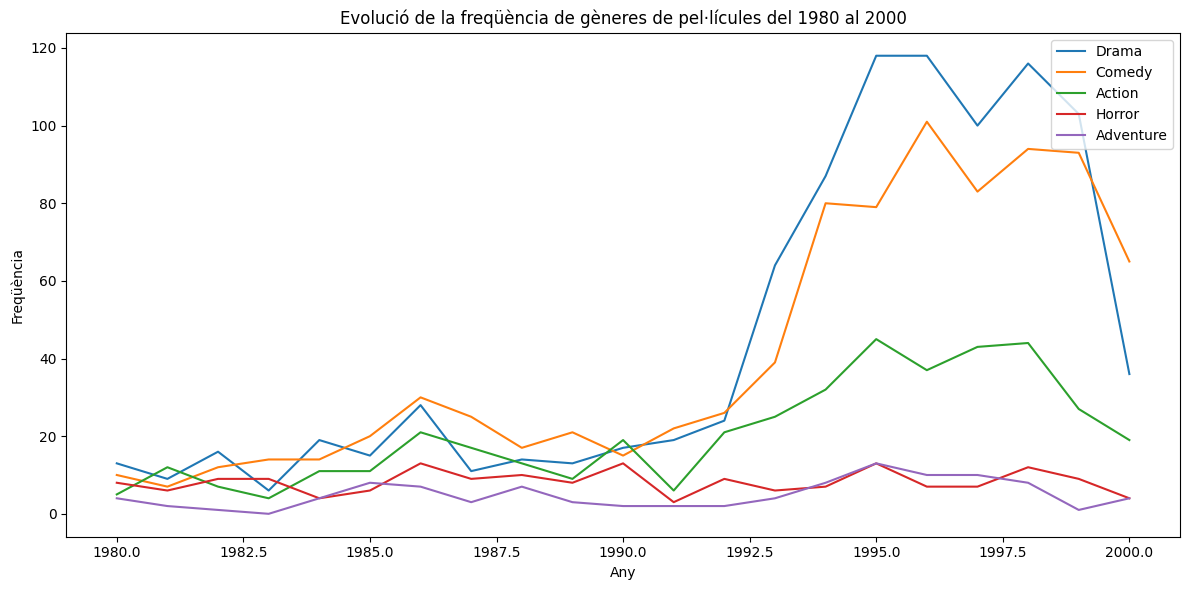

In [27]:
# Agrupem les dades per any i comptem la freqüència de cada gènere
genre_nombre_per_any = df_movies.groupby(['Year', 'Main_genre']).size().unstack(fill_value=0)

# Seleccionem els gèneres que volem visualitzar
genres_grafic = ['Drama', 'Comedy', 'Action', 'Horror', 'Adventure']

# Filtrem les dades per l'interval d'anys que volem veure, en aquest cas des del 1980 al 2000
df_seleccio = df_movies[(df_movies['Year'] >= 1980) & (df_movies['Year'] <= 2000)]

# Agrupem les dades per any i gènere i calcula la freqüència
genre_nombre_per_any = df_seleccio.groupby(['Year', 'Main_genre']).size().unstack(fill_value=0)

# Configurem el gràfic
plt.figure(figsize=(12, 6)) # Indiquem la mida

for genre in genres_grafic:
    plt.plot(genre_nombre_per_any.index, genre_nombre_per_any[genre], label=genre)

plt.title('Evolució de la freqüència de gèneres de pel·lícules del 1980 al 2000')
plt.xlabel('Any')
plt.ylabel('Freqüència')
plt.legend(loc='upper right')

# Mostrem el gràfic
plt.tight_layout()
plt.show()



A través del gràfic, podem observar que a partir de l'any 1991 va haver un fort increment de películes de gènere Drama i Comèdia. Del 1999 al 2000 aquesta freqüència baixa en picat, sobretot en el gènere Drama, que passa a aproximar-se al d'Acció.